In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

In [2]:
#read in data
data = pd.read_csv('data.csv')
del data['Unnamed: 0']

data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
data.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## fix columns names

In [3]:
data.rename(columns={'SeriousDlqin2yrs':'delinquent','RevolvingUtilizationOfUnsecuredLines':'revolveUtilUnsecured','NumberOfTime30-59DaysPastDueNotWorse':'times30to59dayslate','DebtRatio':'debtRatio', 'MonthlyIncome':'monthlyIncome', 'NumberOfOpenCreditLinesAndLoans':'totalCreditLines', 'NumberOfTimes90DaysLate':'times90DaysLate', 'NumberRealEstateLoansOrLines':'realEstateLines', 'NumberOfTime60-89DaysPastDueNotWorse':'times60to89dayslate', 'NumberOfDependents':'dependents'   }, inplace = True)

## data types

In [93]:
data.dtypes

delinquent                int64
revolveUtilUnsecured    float64
age                       int64
times30to59dayslate       int64
debtRatio               float64
monthlyIncome           float64
totalCreditLines          int64
times90DaysLate           int64
realEstateLines           int64
times60to89dayslate       int64
dependents              float64
dtype: object

# Exploratory Data Analysis
## target distribution

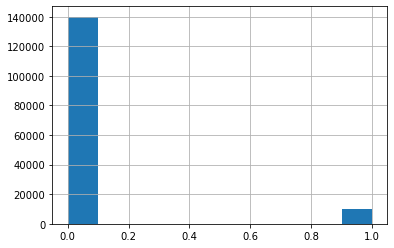

In [94]:
data.delinquent.hist()

## missings

In [68]:
print(data.isnull().sum())

deliquent                   0
revolveUtilUnsecured        0
age                         0
times30to59dayslate         0
debtRatio                   0
monthlyIncome           29731
totalCreditLines            0
times90DaysLate             0
realEstateLines             0
times60to89dayslate         0
dependents               3924
dtype: int64


## feature distribution

### revolveUtilUnsecured

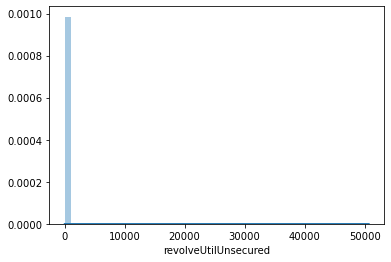

In [29]:
sns.distplot(data.revolveUtilUnsecured)

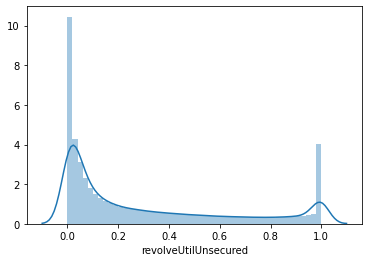

In [84]:
sns.distplot(data.revolveUtilUnsecured[data.revolveUtilUnsecured  <= 1])

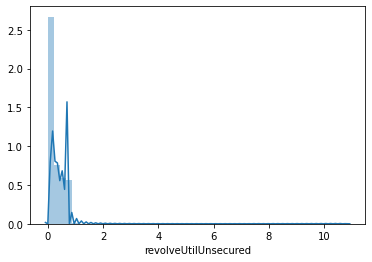

In [32]:
sns.distplot(np.log1p(data.revolveUtilUnsecured))

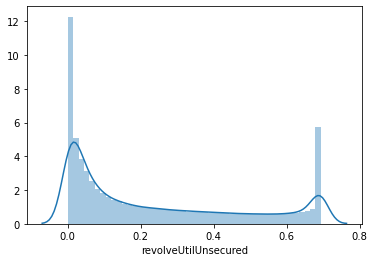

In [83]:
sns.distplot(np.log1p(data.revolveUtilUnsecured[data.revolveUtilUnsecured  < 1]))

In [85]:
#data.count()
data.revolveUtilUnsecured[data.revolveUtilUnsecured < 1].count()

146662

In [97]:
print(data.revolveUtilUnsecured[data.revolveUtilUnsecured > 1].count())
print(data.revolveUtilUnsecured[(data.revolveUtilUnsecured > 1) & (data.delinquent  == 1)].count())

3321
1237


In [98]:
print(data.revolveUtilUnsecured[data.revolveUtilUnsecured < 1].count())
print(data.revolveUtilUnsecured[(data.revolveUtilUnsecured < 1) & (data.delinquent  == 1)].count())

146662
8785


### age

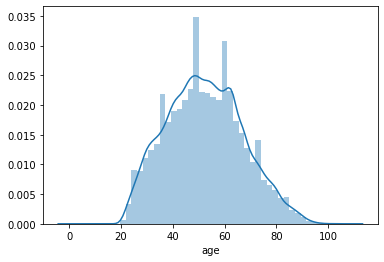

In [99]:
sns.distplot(data.age)

In [105]:
print(data.revolveUtilUnsecured[data.age < 18].count())

1
4936


In [112]:
print(data.revolveUtilUnsecured[data.age > 70].count())
print(data.revolveUtilUnsecured[(data.age > 70) & (data.delinquent  == 1)].count())

print(data.revolveUtilUnsecured[data.age > 80].count())
print(data.revolveUtilUnsecured[(data.age > 80) & (data.delinquent  == 1)].count())

print(data.revolveUtilUnsecured[data.age > 90].count())
print(data.revolveUtilUnsecured[(data.age > 90) & (data.delinquent  == 1)].count())

print(data.revolveUtilUnsecured[data.age > 100].count())
print(data.revolveUtilUnsecured[(data.age > 100) & (data.delinquent  == 1)].count())


17636
398
4936
100
489
11
13
1


### times30to59dayslate        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


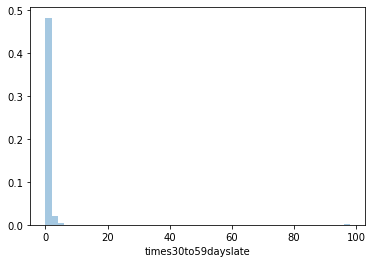

In [44]:
sns.distplot(data.times30to59dayslate)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


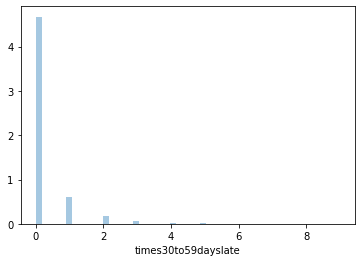

In [45]:
sns.distplot(data.times30to59dayslate[data.times30to59dayslate < 10])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


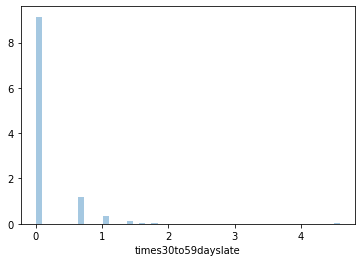

In [46]:
sns.distplot(np.log1p(data.times30to59dayslate))

### debtRatio               

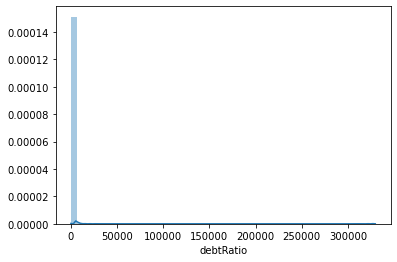

In [69]:
sns.distplot(data.debtRatio)

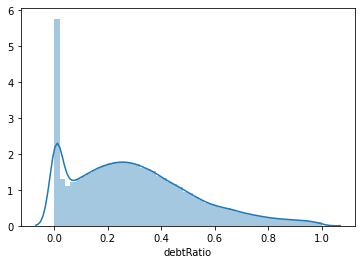

In [75]:
sns.distplot(data.debtRatio[data.debtRatio < 1])

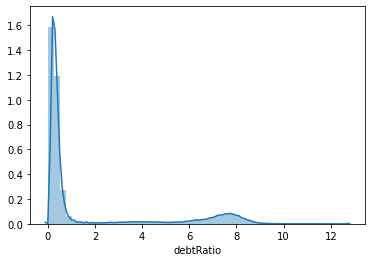

In [113]:
sns.distplot(np.log1p(data.debtRatio))

In [136]:
print(data.debtRatio[data.debtRatio > 1].count())
print(data.debtRatio[(data.debtRatio > 1) & (data.delinquent  == 1)].count())

print(data.debtRatio[(data.debtRatio > 1) & (data.monthlyIncome.notnull())].count())
print(data.debtRatio[(data.debtRatio > 1) & (data.delinquent  == 1) & (data.monthlyIncome.notnull())].count() )

print(data.debtRatio[data.debtRatio <= 1].count())
print(data.debtRatio[(data.debtRatio <= 1) & (data.delinquent  == 1)].count())

35137
2291
7233
733
114863
7735


In [116]:
print(2291/35137)
print(7735/114863)

0.06520192389788541
0.06734109330245597


### monthlyIncome    

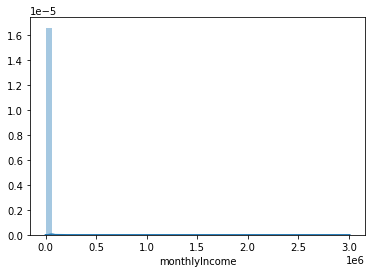

In [137]:
sns.distplot(data.monthlyIncome)

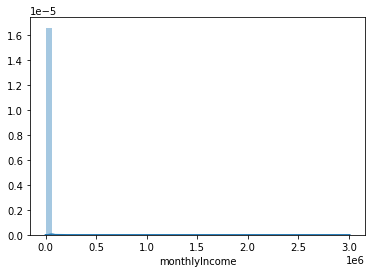

In [138]:
sns.distplot(data.monthlyIncome[data.monthlyIncome.notnull()])

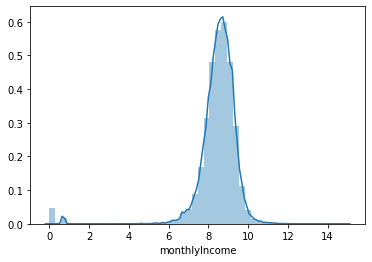

In [53]:
sns.distplot(np.log1p(data.monthlyIncome))

### totalCreditLines 

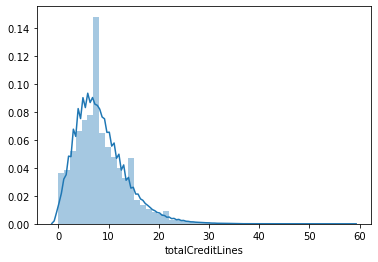

In [54]:
sns.distplot(data.totalCreditLines)

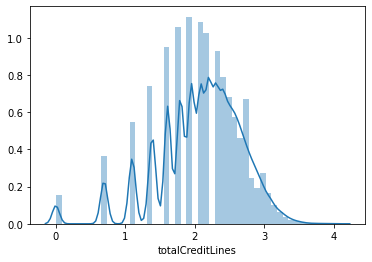

In [55]:
sns.distplot(np.log1p(data.totalCreditLines))

### times90DaysLate 

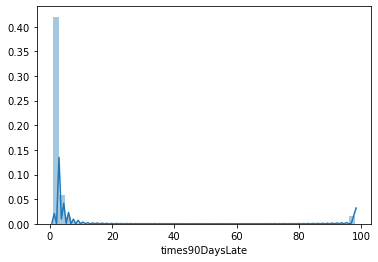

In [58]:
sns.distplot(data.times90DaysLate)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


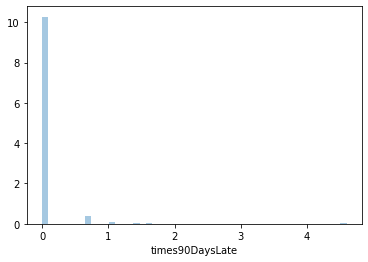

In [60]:
sns.distplot(np.log1p(data.times90DaysLate))

### realEstateLines 

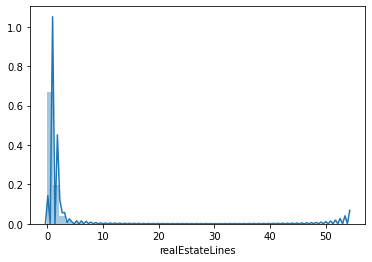

In [61]:
sns.distplot(data.realEstateLines)

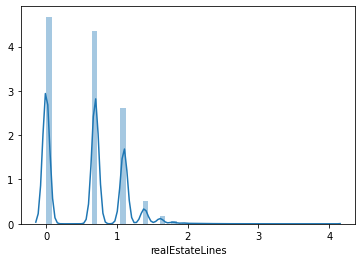

In [62]:
sns.distplot(np.log1p(data.realEstateLines))

### times60to89dayslate       

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


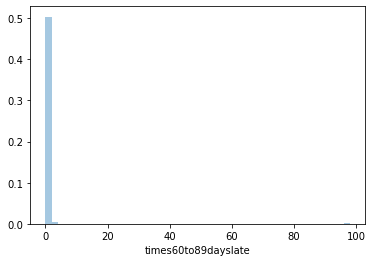

In [63]:
sns.distplot(data.times60to89dayslate)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


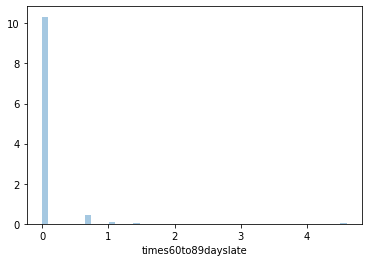

In [64]:
sns.distplot(np.log1p(data.times60to89dayslate))

### dependents

sns.distplot(data.dependents)

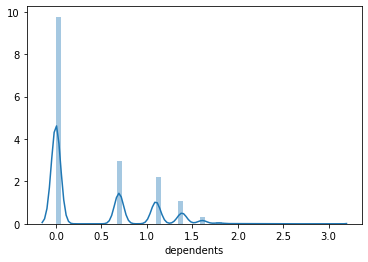

In [67]:
sns.distplot(np.log1p(data.dependents))

# Summary of EDA and actions per variable

target (delinquent) : target has a very low postive rate, can't use accuracy as performance measure, will use ROC AUC

revolveUtilUnsecured : A few outliers outside of the expected range of 0 - 1, these have a higher rate of delinquency than those that are within the range. Apply log transform to bring tail in.

age : one individual younger than 18, not expected. will force this value to be equal to 18 atleast.             

times30to59dayslate: very long tail, log-transformation helps this out a bit, but not a lot

debtRatio: strange behaviour, expected range is 0-1, 20% of values lie above this, and only some can be explained by missing monthlyIncome values. Need to try models with and without this.

monthlyIncome : many missing values, Consider imputing with avg's, and creating indicator that corresponds with missing incomes.   

totalCreditLines : well populated, looks good with log transformation

times90DaysLate : apply log transform, deals with tail values a bit better

realEstateLines :  apply log transform, deals with tail values a bit better

times60to89dayslate : apply log transform, deals with tail values a bit better
 
dependents : a few missings, impute with 0's

One-hot-encoding isn't required, since there are no categorical values.

# Apply data cleaning/transformation techniques

In [4]:
data.revolveUtilUnsecured = np.log1p(data.revolveUtilUnsecured)
data.age[data.age < 18] = 18
data.times30to59dayslate = np.log1p(data.times30to59dayslate)

data.loc[data.monthlyIncome.isnull(), 'incomeNullInd'] = 1
data.incomeNullInd = data.incomeNullInd.fillna(0).astype(int)

incomeAvg = data.monthlyIncome.mean()

data.monthlyIncome.fillna(data.monthlyIncome.mean(), inplace = True)

data.totalCreditLines = np.log1p(data.totalCreditLines)
data.times90DaysLate = np.log1p(data.times90DaysLate)
data.realEstateLines = np.log1p(data.realEstateLines)
data.times60to89dayslate = np.log1p(data.times60to89dayslate)
data.dependents.fillna(0,inplace = True)

<ipython-input-4-14b9d3d7316c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[data.age < 18] = 18


# Train / Validation split

Train: 60%
Validation: 20%
Test: 20%

In [5]:
df_full_train, df_test = train_test_split(data, test_size=0.20, random_state=42)
df_train, df_valid = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

x_train = df_train
x_valid = df_valid
x_test = df_test
x_full_train = df_full_train

y_train = x_train.delinquent.values
y_valid = x_valid.delinquent.values
y_test = x_test.delinquent.values
y_full_train = x_full_train.delinquent.values

del x_train['delinquent']
del x_valid['delinquent']
del x_test['delinquent']
del x_full_train['delinquent']

# Model Training

Feature importance:
    - mutual Information
    - ROC AUC as feature importance

Models to try: 
    - logistic regression
    - decision tree
    - random forest
    - XGBoost

### Mutual information

In [12]:
features = x_train.columns
for f in features:
    mis = mutual_info_score(y_train, x_train[f])
    print(f'feature: {f}, \t\t\t mis: {mis}')
    

feature: revolveUtilUnsecured, 			 mis: 0.2004938662447785
feature: age, 			 mis: 0.007955303108460845
feature: times30to59dayslate, 			 mis: 0.026206465093920113
feature: debtRatio, 			 mis: 0.20872521455675078
feature: monthlyIncome, 			 mis: 0.04443906307288883
feature: totalCreditLines, 			 mis: 0.003867059350686132
feature: times90DaysLate, 			 mis: 0.031042469191382246
feature: realEstateLines, 			 mis: 0.002092341926438132
feature: times60to89dayslate, 			 mis: 0.02151475091008439
feature: dependents, 			 mis: 0.001111825501385698
feature: incomeNullInd, 			 mis: 0.00027616249725819636


### ROC AUC Score

In [14]:
features = x_train.columns
for f in features:
    auc = roc_auc_score(y_train, x_train[f])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -x_train[f])
    print(f'feature: {f}, \t\t\t mis: {auc}')

feature: revolveUtilUnsecured, 			 mis: 0.7763436702513091
feature: age, 			 mis: 0.6350074120941938
feature: times30to59dayslate, 			 mis: 0.6889558899150989
feature: debtRatio, 			 mis: 0.521796300323472
feature: monthlyIncome, 			 mis: 0.5722455554132079
feature: totalCreditLines, 			 mis: 0.5412376336894031
feature: times90DaysLate, 			 mis: 0.6539472229064835
feature: realEstateLines, 			 mis: 0.536940038736072
feature: times60to89dayslate, 			 mis: 0.6204654959759373
feature: dependents, 			 mis: 0.5476923398777543
feature: incomeNullInd, 			 mis: 0.5183669733840621


## Logistic Regression

Try features in this order:
    - revolveUtilUnsecured
    - monthlyincome
    - age
    - times30to59dayslate
    - times60to89dayslate
    - times90DaysLate
    - debtRatio
    - dependents
    - monthlyIncome
    - totalCreditLines
    - incomeNullInd
    

In [6]:
#features = ['revolveUtilUnsecured','monthlyIncome','age','times30to59dayslate','times60to89dayslate','times90DaysLate','debtRatio','dependents','monthlyIncome','totalCreditLines','incomeNullInd']
features = ['revolveUtilUnsecured','times30to59dayslate','times60to89dayslate','times90DaysLate','incomeNullInd','debtRatio','dependents','monthlyIncome','totalCreditLines']
list = []

for f in features:
    list.append(f)
    
    model = LogisticRegression()
    model.fit(x_train[list], y_train)
      
    preds = model.predict_proba(x_valid[list])[:,1]
    
    auc = roc_auc_score(y_valid, preds)
    print(list)
    print(auc)
    print('****************************************************')
    
finalLogisticReg = LogisticRegression()
finalLogisticReg.fit(x_full_train[['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate', 'times90DaysLate']], y_full_train)

['revolveUtilUnsecured']
0.7780597158605955
****************************************************
['revolveUtilUnsecured', 'times30to59dayslate']
0.813125760129973
****************************************************
['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate']
0.8287683035975615
****************************************************
['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate', 'times90DaysLate']
0.8500054880047981
****************************************************
['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate', 'times90DaysLate', 'incomeNullInd']
0.8476385890748446
****************************************************
['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate', 'times90DaysLate', 'incomeNullInd', 'debtRatio']
0.8468711548144208
****************************************************
['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate', 'times90DaysLate', 'incomeNullInd', '

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate', 'times90DaysLate', 'incomeNullInd', 'debtRatio', 'dependents', 'monthlyIncome', 'totalCreditLines']
0.7903027170365621
****************************************************


LogisticRegression()

## Decision Tree

Parameters to tune: 
    - Max depth
    - Min Samples Leaf

In [72]:
scores = []
for depth_ in [2,3,4,5,6,7,8,9,10]:
    for sample_ in [10,50,100,250,500,1000,1500,3000,4500]:
        model =  DecisionTreeClassifier(max_depth = depth_, min_samples_leaf = sample_, random_state = 42)
        model.fit(x_train, y_train)
        preds = model.predict_proba(x_valid)[:,1]
        auc = roc_auc_score(y_valid, preds)
        scores.append((depth_, sample_, auc))

                    auc                                                   \
max_depth            2      3      4      5      6      7      8      9    
min_samples_leaf                                                           
10                0.782  0.821  0.834  0.851  0.854  0.854  0.848  0.840   
50                0.782  0.821  0.834  0.851  0.854  0.858  0.857  0.857   
100               0.782  0.821  0.834  0.851  0.854  0.859  0.858  0.857   
250               0.782  0.821  0.834  0.851  0.855  0.858  0.860  0.858   
500               0.782  0.821  0.834  0.851  0.855  0.859  0.862  0.862   
1000              0.782  0.821  0.842  0.846  0.850  0.852  0.853  0.854   
1500              0.782  0.821  0.842  0.847  0.851  0.852  0.854  0.854   
3000              0.780  0.819  0.838  0.843  0.846  0.848  0.849  0.849   
4500              0.780  0.819  0.837  0.842  0.845  0.846  0.846  0.846   

                         
max_depth            10  
min_samples_leaf         
10       

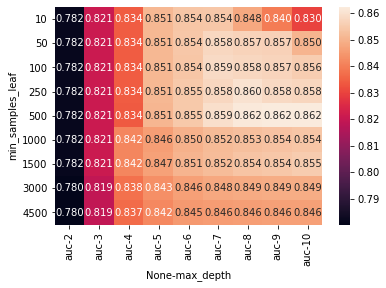

In [73]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values=['auc'])
print(df_scores_pivot.round(3))
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [7]:
finalDeicisionTree = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 500, random_state = 42)
finalDeicisionTree.fit(x_full_train, y_full_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=500, random_state=42)

## Random Forest

Parameters to tune: 
    - n_estimators
    - Max depth
    - Min Samples Leaf

In [ ]:
forestscores = []
for estimators_ in [10,20,50,100,200,500]:
    for depth_ in [2,3,4,5,6,7,8,9,10]:
        for samples_ in [10,50,100,250,500,1000,1500]:
            model =  RandomForestClassifier(n_estimators = estimators_, max_depth = depth_, min_samples_leaf = samples_, random_state = 42)
            model.fit(x_train, y_train)
            preds = model.predict_proba(x_valid)[:,1]
            auc = roc_auc_score(y_valid, preds)
            forestscores.append((estimators, depth_, samples_, auc))
            

In [115]:
forestscores = []
counter = 1
for depth_ in [4,5,6,7,8,9,10]:
    for samples_ in [10,50,100,250,500,1000,1500]:
        model =  RandomForestClassifier(n_estimators = 10, max_depth = depth_, min_samples_leaf = samples_, random_state = 42)
        model.fit(x_train, y_train)
        preds = model.predict_proba(x_valid)[:,1]
        auc = roc_auc_score(y_valid, preds)
        forestscores.append((depth_, samples_, auc))
        print(f'*************** {counter} forests completed ***************')
        counter = counter +1
            
 

*************** 1 forests completed ***************
*************** 2 forests completed ***************
*************** 3 forests completed ***************
*************** 4 forests completed ***************
*************** 5 forests completed ***************
*************** 6 forests completed ***************
*************** 7 forests completed ***************
*************** 8 forests completed ***************
*************** 9 forests completed ***************
*************** 10 forests completed ***************
*************** 11 forests completed ***************
*************** 12 forests completed ***************
*************** 13 forests completed ***************
*************** 14 forests completed ***************
*************** 15 forests completed ***************
*************** 16 forests completed ***************
*************** 17 forests completed ***************
*************** 18 forests completed ***************
*************** 19 forests completed ***************
**

                    auc                                          
max_depth            4      5      6      7      8      9      10
min_samples_leaf                                                 
10                0.859  0.862  0.865  0.866  0.866  0.869  0.867
50                0.859  0.862  0.864  0.866  0.867  0.868  0.868
100               0.859  0.862  0.866  0.867  0.866  0.868  0.870
250               0.859  0.862  0.865  0.864  0.866  0.868  0.868
500               0.860  0.862  0.864  0.864  0.866  0.867  0.868
1000              0.860  0.861  0.864  0.864  0.863  0.865  0.866
1500              0.860  0.859  0.862  0.862  0.862  0.863  0.862


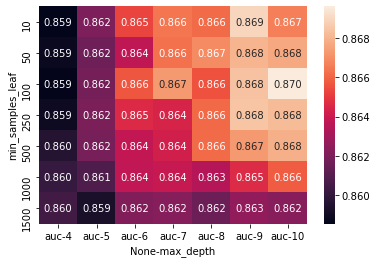

In [116]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_forestscores = pd.DataFrame(forestscores, columns = columns)

df_forestscores_pivot = df_forestscores.pivot(index='min_samples_leaf', columns='max_depth', values=['auc'])
print(df_forestscores_pivot.round(3))
sns.heatmap(df_forestscores_pivot, annot=True, fmt=".3f")

*************** 1 forests completed ***************
*************** 2 forests completed ***************
*************** 3 forests completed ***************
*************** 4 forests completed ***************
*************** 5 forests completed ***************
*************** 6 forests completed ***************
*************** 7 forests completed ***************
*************** 8 forests completed ***************
*************** 9 forests completed ***************
*************** 10 forests completed ***************
*************** 11 forests completed ***************
*************** 12 forests completed ***************
*************** 13 forests completed ***************
*************** 14 forests completed ***************
              auc                                                          \
max_depth      2      3      4      5      6      7      8      9      10   
estimators                                                                  
10          0.854  0.855  0.859  0.8

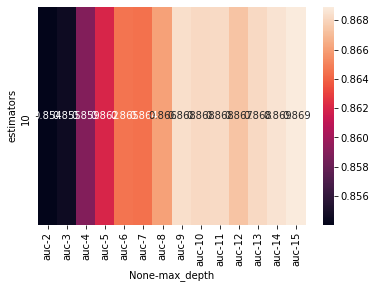

In [110]:
forestscores = []
counter = 1
for estimators_ in [10]:
    for depth_ in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
        model =  RandomForestClassifier(n_estimators = estimators_, max_depth = depth_, min_samples_leaf = 250 , random_state = 42)
        model.fit(x_train, y_train)
        preds = model.predict_proba(x_valid)[:,1]
        auc = roc_auc_score(y_valid, preds)
        forestscores.append((estimators_, depth_, auc))
        print(f'*************** {counter} forests completed ***************')
        counter = counter +1
        
columns = ['estimators', 'max_depth', 'auc']
df_forestscores = pd.DataFrame(forestscores, columns = columns)

df_forestscores_pivot = df_forestscores.pivot(index='estimators', columns='max_depth', values=['auc'])
print(df_forestscores_pivot.round(3))
sns.heatmap(df_forestscores_pivot, annot=True, fmt=".3f")            

In [ ]:
forestscores = []
counter = 1
for estimators_ in [10,50,100,250]:
    for depth_ in [9]:
        model =  RandomForestClassifier(n_estimators = estimators_, max_depth = depth_, min_samples_leaf = 250 , random_state = 42)
        model.fit(x_train, y_train)
        preds = model.predict_proba(x_valid)[:,1]
        auc = roc_auc_score(y_valid, preds)
        forestscores.append((estimators_, depth_, auc))
        print(f'*************** {counter} forests completed ***************')
        counter = counter +1
        
columns = ['estimators', 'max_depth', 'auc']
df_forestscores = pd.DataFrame(forestscores, columns = columns)

df_forestscores_pivot = df_forestscores.pivot(index='estimators', columns='max_depth', values=['auc'])
print(df_forestscores_pivot.round(3))
sns.heatmap(df_forestscores_pivot, annot=True, fmt=".3f")   

In [8]:
finalRandomForest = RandomForestClassifier(n_estimators = 50,max_depth = 9, min_samples_leaf = 100, random_state = 42)
finalRandomForest.fit(x_full_train, y_full_train)    

RandomForestClassifier(max_depth=9, min_samples_leaf=100, n_estimators=50,
                       random_state=42)

## XGBoost

Parameters to tune: 
    - eta
    - max depth
    - min child weight

In [18]:
features = x_train.columns
dtrain = xgb.DMatrix(x_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(x_valid, label=y_valid, feature_names=features)
dfullTrainval = xgb.DMatrix(x_full_train, label=y_full_train, feature_names=features)
dTest = xgb.DMatrix(x_test, label = y_test, feature_names = features)

In [11]:
%%capture output
scores = {}

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results



###  eta

In [ ]:
scores = {}

In [ ]:
%%capture output
xgb_params = {
    'eta': 0.01, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [161]:
%%capture output
xgb_params = {
    'eta': 0.05, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [162]:
%%capture output
xgb_params = {
    'eta': 0.1, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [163]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [ ]:
%%capture output
xgb_params = {
    'eta': 1.0, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

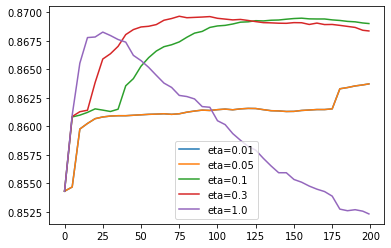

In [176]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

#plt.ylim(0.84, 0.88)
plt.legend()


###  max_depth

In [178]:
scoresDepth = {}

In [179]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 2,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
scoresDepth[key] = parse_xgb_output(output)

In [180]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
scoresDepth[key] = parse_xgb_output(output)

In [181]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
scoresDepth[key] = parse_xgb_output(output)

In [182]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 8,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
scoresDepth[key] = parse_xgb_output(output)

In [183]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'max_depth=%s' % (xgb_params['max_depth'])
scoresDepth[key] = parse_xgb_output(output)

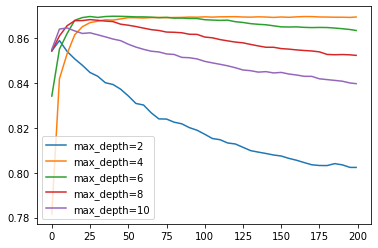

In [184]:
for max_depth, df_score in scoresDepth.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

#plt.ylim(0.84, 0.88)
plt.legend()


## min child weight

In [185]:
scoresChild = {}

In [186]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scoresChild[key] = parse_xgb_output(output)

In [187]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scoresChild[key] = parse_xgb_output(output)

In [ ]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scoresChild[key] = parse_xgb_output(output)

In [190]:
%%capture output
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 50,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scoresChild[key] = parse_xgb_output(output)

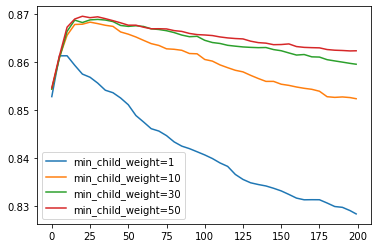

In [192]:
for max_child, df_score in scoresChild.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_child)

#plt.ylim(0.84, 0.88)
plt.legend()


### final XGBOOST

In [19]:
xgb_params = {
    'eta': 0.3, #try values: 0.01, 0.05, 0.1, 0.3, 1
    'max_depth': 6,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
finalXGBoost = xgb.train(xgb_params, dfullTrainval, num_boost_round=25,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.84868	val-auc:0.85752
[5]	train-auc:0.85718	val-auc:0.86615
[10]	train-auc:0.86691	val-auc:0.87359
[15]	train-auc:0.87089	val-auc:0.87835
[20]	train-auc:0.87433	val-auc:0.88147
[24]	train-auc:0.87608	val-auc:0.88279


# final evaluation of models on test set

## test scoring

In [23]:
logisticTest = finalLogisticReg.predict_proba(x_test[['revolveUtilUnsecured', 'times30to59dayslate', 'times60to89dayslate', 'times90DaysLate']])[:,1]
decisionTreeTest = finalDeicisionTree.predict_proba(x_test)[:,1]
randomForestTest = finalRandomForest.predict_proba(x_test)[:,1]
xgbTest = finalXGBoost.predict(dTest)

## AUC calculation

In [28]:
logisticAuc = roc_auc_score(y_test, logisticTest)
decistionTreeAuc = roc_auc_score(y_test, decisionTreeTest)
randomforestAuc = roc_auc_score(y_test, randomForestTest)
xgbAuc = roc_auc_score(y_test, xgbTest)

print(f'Model: logistic regression, AUC: {logisticAuc}')
print(f'Model: decision tree, AUC: {decistionTreeAuc}')
print(f'Model: random forest, AUC: {randomforestAuc}')
print(f'Model: xgBoost, AUC: {xgbAuc}')
      

Model: logistic regression, AUC: 0.8407069164465188
Model: decision tree, AUC: 0.8513916124792504
Model: random forest, AUC: 0.8626255659015528
Model: xgBoost, AUC: 0.8629411304876153


### random forest with no missing impute

In [32]:
data.revolveUtilUnsecured = np.log1p(data.revolveUtilUnsecured)
data.age[data.age < 18] = 18
data.times30to59dayslate = np.log1p(data.times30to59dayslate)

#data.loc[data.monthlyIncome.isnull(), 'incomeNullInd'] = 1
#data.incomeNullInd = data.incomeNullInd.fillna(0).astype(int)

incomeAvg = data.monthlyIncome.mean()

data.totalCreditLines = np.log1p(data.totalCreditLines)
data.times90DaysLate = np.log1p(data.times90DaysLate)
data.realEstateLines = np.log1p(data.realEstateLines)
data.times60to89dayslate = np.log1p(data.times60to89dayslate)


df_full_train, df_test = train_test_split(data, test_size=0.20, random_state=42)
df_train, df_valid = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

x_train = df_train
x_valid = df_valid
x_test = df_test
x_full_train = df_full_train

y_train = x_train.delinquent.values
y_valid = x_valid.delinquent.values
y_test = x_test.delinquent.values
y_full_train = x_full_train.delinquent.values

del x_train['delinquent']
del x_valid['delinquent']
del x_test['delinquent']
del x_full_train['delinquent']

<ipython-input-32-caa30883b9bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age[data.age < 18] = 18


In [33]:
finalRandomForest = RandomForestClassifier(n_estimators = 50,max_depth = 9, min_samples_leaf = 100, random_state = 42)
finalRandomForest.fit(x_full_train, y_full_train)    

RandomForestClassifier(max_depth=9, min_samples_leaf=100, n_estimators=50,
                       random_state=42)

In [34]:
randomForestTest = finalRandomForest.predict_proba(x_test)[:,1]
randomforestAuc = roc_auc_score(y_test, randomForestTest)
print(f'Model: random forest, no missing imputation, AUC: {randomforestAuc}')

Model: random forest, AUC: 0.8626256205921224
